In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [ ]:
# Libraries

import calendar
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import locale
from dateutil import tz
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules,apriori
from scipy import sparse
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Import Dataset

df = pd.read_csv("/content/drive/MyDrive/Orbit/Final Project/REVISI/nyka_top_brands_cosmetics_product_reviews (1).csv",
                 encoding = 'latin1')
print(df.head)

<bound method NDFrame.head of       product_id               brand_name  review_id  \
0         781070                     Olay   16752142   
1         781070                     Olay   14682550   
2         781070                     Olay   15618995   
3         781070                     Olay   13474509   
4         781070                     Olay   16338982   
...          ...                      ...        ...   
4122      173656  NYX Professional Makeup    2222794   
4123      173656  NYX Professional Makeup    2377558   
4124      173656  NYX Professional Makeup    2495427   
4125      173656  NYX Professional Makeup    5306501   
4126     1134707  NYX Professional Makeup   18247862   

                             review_title  \
0                    Worth buying 50g one   
1              Best cream to start ur day   
2     perfect for summers dry for winters   
3                       Not a moisturizer   
4                                 Average   
...                        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Melihat Kolom yang Ada di Dataset
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['product_id', 'brand_name', 'review_id', 'review_title', 'review_text',
       'author', 'review_date', 'review_rating', 'is_a_buyer', 'pro_user',
       'review_label', 'product_title', 'mrp', 'price', 'product_rating',
       'product_rating_count', 'product_tags', 'product_url'],
      dtype='object')

In [ ]:
# Membuat Tabel Data

df = df[['review_date','author','brand_name','product_title','price',
             'review_rating','review_text','product_rating']]
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_date,author,brand_name,product_title,price,review_rating,review_text,product_rating
0,2021-01-23 15:17:18,Ashton Dsouza,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,5.0,Works as it claims. Could see the difference f...,4.1
1,2020-09-07 15:30:42,Amrit Neelam,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,5.0,It does what it claims . Best thing is it smoo...,4.1
2,2020-11-13 12:24:14,Sanchi Gupta,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,4.0,I have been using this product for months now....,4.1
3,2020-06-14 11:56:50,Ruchi Shah,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,3.0,"i have an oily skin, while this whip acts as a...",4.1
4,2020-12-22 15:24:35,Sukanya Sarkar,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,2.0,It's not that good. Please refresh try for oth...,4.1
...,...,...,...,...,...,...,...,...
4122,2018-06-28 0:36:36,Preeya Deb,NYX Professional Makeup,NYX Professional Makeup Suede Matte Lip Liner,450,5.0,Nyx products are really pigmented and have goo...,4.0
4123,2018-07-15 0:57:09,Annie Sana,NYX Professional Makeup,NYX Professional Makeup Suede Matte Lip Liner,450,5.0,Glides like dream and long lasting,4.0
4124,2018-07-27 17:27:32,garima jain,NYX Professional Makeup,NYX Professional Makeup Suede Matte Lip Liner,450,5.0,Good pigmentation and glides on like a dream,4.0
4125,2019-05-19 15:39:46,Pooja Borkar,NYX Professional Makeup,NYX Professional Makeup Suede Matte Lip Liner,450,4.0,it's a good product but after 2-3hrs it's beco...,4.0


In [ ]:
# Mengatur Tanggal-Waktu
df['review_date'] = pd.to_datetime(df['review_date'])
bins1 = pd.to_datetime(['00:00:00', '12:00:00', '18:00:00', '23:59:59'])
df['Jam'] = df['review_date'].dt.hour
df['Waktu'] = pd.cut(df['Jam'], bins=[0, 12, 18, 24],
                     labels=['Pagi', 'Siang', 'Malam'])

# Mengatur Timezone UTC
df['review_date'] = df['review_date'].dt.tz_localize(tz.UTC)

# Convert to desired timezone (e.g. Asia/Jakarta)
df['review_date'] = df['review_date'].dt.tz_convert(tz.gettz('Asia/Jakarta'))

# Extract day name, month name, and year
df['Hari'] = df['review_date'].dt.day_name()
df['Bulan'] = df['review_date'].dt.month_name()
df['Tahun'] = df['review_date'].dt.year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Menampilkan Isi Dataset
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_date,author,brand_name,product_title,price,review_rating,review_text,product_rating,Jam,Waktu,Hari,Bulan,Tahun
0,2021-01-23 22:17:18+07:00,Ashton Dsouza,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,5.0,Works as it claims. Could see the difference f...,4.1,15,Siang,Saturday,January,2021
1,2020-09-07 22:30:42+07:00,Amrit Neelam,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,5.0,It does what it claims . Best thing is it smoo...,4.1,15,Siang,Monday,September,2020
2,2020-11-13 19:24:14+07:00,Sanchi Gupta,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,4.0,I have been using this product for months now....,4.1,12,Pagi,Friday,November,2020
3,2020-06-14 18:56:50+07:00,Ruchi Shah,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,3.0,"i have an oily skin, while this whip acts as a...",4.1,11,Pagi,Sunday,June,2020
4,2020-12-22 22:24:35+07:00,Sukanya Sarkar,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,2.0,It's not that good. Please refresh try for oth...,4.1,15,Siang,Tuesday,December,2020


In [ ]:
# Mencari Nilai Null di Dataset
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


review_date         0
author              0
brand_name          0
product_title       0
price               0
review_rating       1
review_text         0
product_rating      0
Jam                 0
Waktu             165
Hari                0
Bulan               0
Tahun               0
dtype: int64

In [ ]:
# Menghapus Nilai yang Null
df.to_csv('clean.csv')
df = df.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Melihat Kembali Kolom yang Ada di Dataset
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['review_date', 'author', 'brand_name', 'product_title', 'price',
       'review_rating', 'review_text', 'product_rating', 'Jam', 'Waktu',
       'Hari', 'Bulan', 'Tahun'],
      dtype='object')

In [ ]:
# Melihat Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4126
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype                                                     
---  ------          --------------  -----                                                     
 0   review_date     3961 non-null   datetime64[ns, tzfile('/usr/share/zoneinfo/Asia/Jakarta')]
 1   author          3961 non-null   object                                                    
 2   brand_name      3961 non-null   object                                                    
 3   product_title   3961 non-null   object                                                    
 4   price           3961 non-null   int64                                                     
 5   review_rating   3961 non-null   float64                                                   
 6   review_text     3961 non-null   object                                                    
 7   product_rating  3961 non

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Melihat Nilai Rating pada Review
df['review_rating'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5.0    2180
4.0     977
3.0     370
1.0     256
2.0     178
Name: review_rating, dtype: int64

In [ ]:
# Menampilkan jumlah Nama Brand
pd.DataFrame(df['brand_name'].value_counts())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,brand_name
NYX Professional Makeup,2827
Nivea,753
Olay,381


In [ ]:
# Menampilkan jumlah Product Title
pd.DataFrame(df['product_title'].value_counts())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_title
NYX Professional Makeup Powder Puff Lippie Cream,759
"NIVEA Sun Lotion, SPF 50, with UVA & UVB Protection, Water Resistant Sunscreen",750
NYX Professional Makeup Liquid Suede Cream Lipstick,647
NYX Professional Makeup Born To Glow Liquid Illuminator,598
NYX Professional Makeup Wonder Stick,381
NYX Professional Makeup Suede Matte Lip Liner,229
Olay Eye Cream - With Niacinamide & Pentapeptides,209
NYX Professional Makeup Pore Filler,143
Olay Total Effects Day Cream For Sensitive Skin - Niacinamide,119
NYX Professional Makeup Long Lasting Makeup Setting Spray Radiant Finish,47


In [ ]:
# Menampilkan Author
df['author'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Anonymous          11
Praveen kumar       6
Neha                6
tanisha jain        5
Priyanka            5
                   ..
Jyothi Joseph C     1
B                   1
Euli Chishi         1
abantika bose       1
Sree Warrier        1
Name: author, Length: 3644, dtype: int64

In [ ]:
# Menghitung Frekuensi Kemunculan Masing-masing Author yang Paling Jarang Muncul
pd.DataFrame(df.author.value_counts()).tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,author
Jyothi Joseph C,1
B,1
Euli Chishi,1
abantika bose,1
Sree Warrier,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Text(0, 0, 'NYX Professional Makeup Powder Puff Lippie Cream'),
 Text(1, 0, 'NIVEA Sun Lotion, SPF 50, with UVA & UVB Protection, Water Resistant Sunscreen'),
 Text(2, 0, 'NYX Professional Makeup Liquid Suede Cream Lipstick'),
 Text(3, 0, 'NYX Professional Makeup Born To Glow Liquid Illuminator'),
 Text(4, 0, 'NYX Professional Makeup Wonder Stick'),
 Text(5, 0, 'NYX Professional Makeup Suede Matte Lip Liner'),
 Text(6, 0, 'Olay Eye Cream - With Niacinamide & Pentapeptides'),
 Text(7, 0, 'NYX Professional Makeup Pore Filler'),
 Text(8, 0, 'Olay Total Effects Day Cream For Sensitive Skin - Niacinamide'),
 Text(9, 0, 'NYX Professional Makeup Long Lasting Makeup Setting Spray Radiant Finish')]

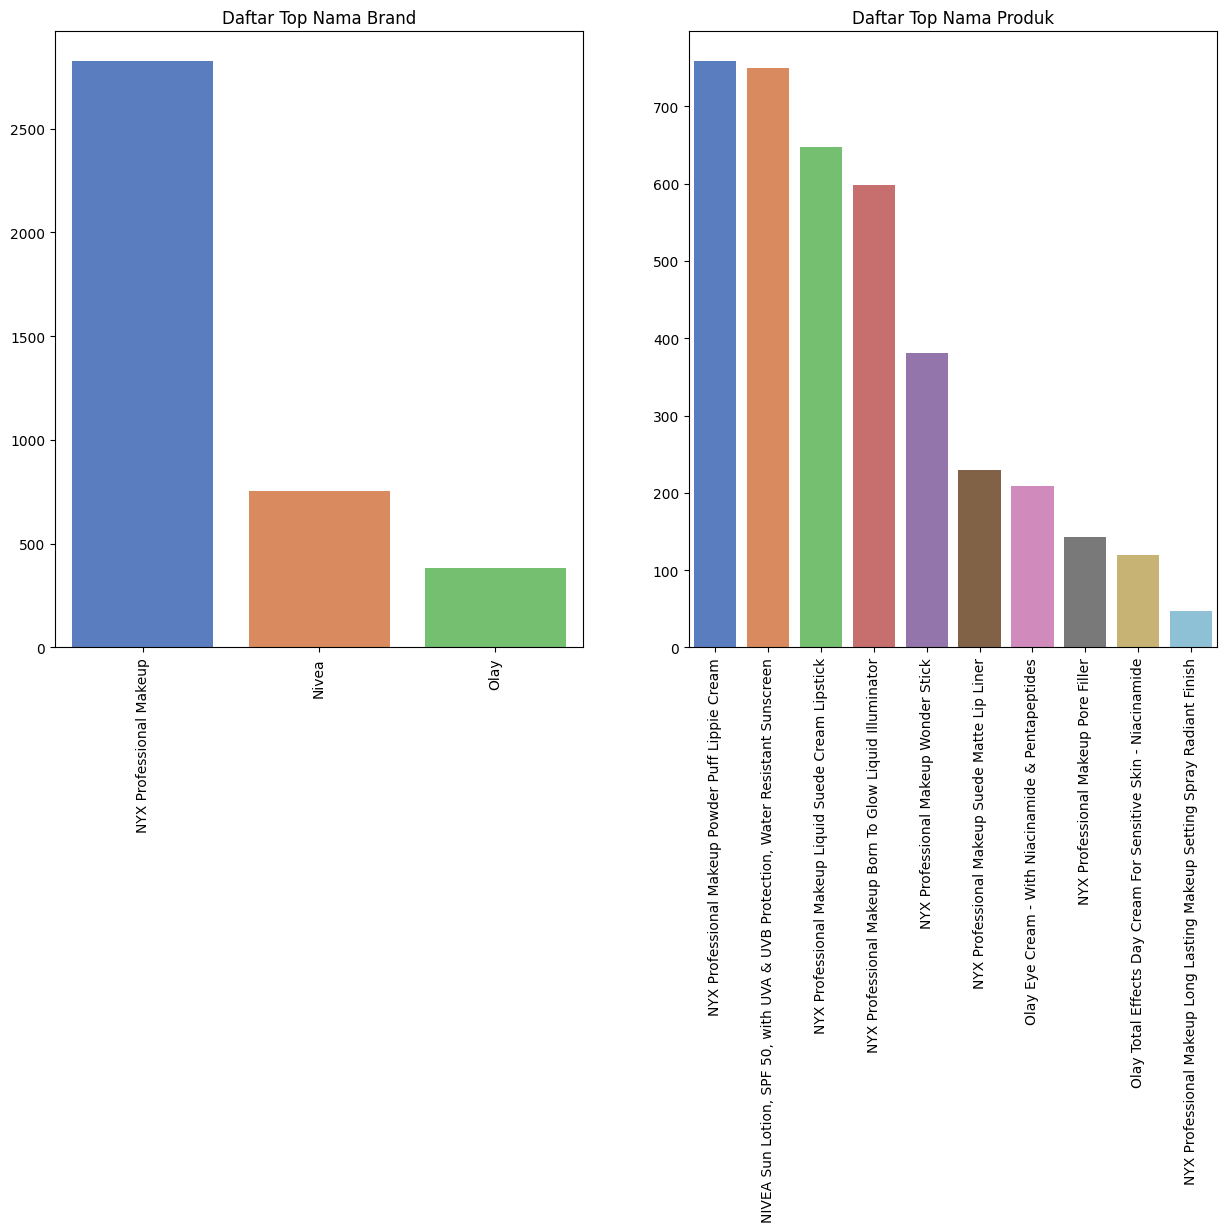

In [ ]:
# Visualisasi

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.set_palette('muted')

sns.barplot(x = df['brand_name'].value_counts()[:10].index,
            y = df['brand_name'].value_counts()[:10].values,ax = ax1)
ax1.set_title('Daftar Top Nama Brand')
ax1.set_xticklabels(df['brand_name'].value_counts()[:10].index,rotation=90)

sns.barplot(x = df['product_title'].value_counts()[:10].index,
            y = df['product_title'].value_counts()[:10].values, ax = ax2)
ax2.set_title('Daftar Top Nama Produk')
ax2.set_xticklabels(df['product_title'].value_counts()[:10].index,rotation=90)

# plt.xlabel(""); plt.ylabel("")
# plt.xticks(size = 8, rotation = 45)
# plt.title('Daftar Urutan Tertinggi Nama Brand',size = 15)

In [ ]:
# Pengolahan Data Menggunakan Pandas
item_count_pivot = df.pivot_table(index='author',columns='product_title',
                                  values= 'review_rating',aggfunc='sum').fillna(0)
item_count_pivot[item_count_pivot > 0] =1
item_count_pivot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_title,"NIVEA Sun Lotion, SPF 50, with UVA & UVB Protection, Water Resistant Sunscreen",NYX Professional Makeup Born To Glow Liquid Illuminator,NYX Professional Makeup Diamonds & Ice - Please Setting Spray Kit,NYX Professional Makeup Liquid Suede Cream Lipstick,NYX Professional Makeup Long Lasting Makeup Setting Spray Radiant Finish,NYX Professional Makeup Must Haves - Tinted Brow Mascara Espresso & Soft Matte Lip Cream Copenhagen,NYX Professional Makeup Pore Filler,NYX Professional Makeup Powder Puff Lippie Cream,NYX Professional Makeup Suede Matte Lip Liner,NYX Professional Makeup Ultimate Multi-Finish Shadow Palette,NYX Professional Makeup Wonder Stick,Nivea Naturally Good Care Box,"Olay Aha & Niacinamide Super Cream , Acne Mark & Spot Removal Cream - For All Skin Types",Olay Eye Cream - With Niacinamide & Pentapeptides,Olay Regenerist Whip Mini and Ultimate Eye Cream Combo,Olay Total Effects 7 In One Anti-Ageing Day Cream Normal SPF 15,Olay Total Effects 7 In One Day Cream Normal SPF 15 (Trial Size) 8gm,Olay Total Effects Day Cream For Sensitive Skin - Niacinamide,Olay Ultimate Skin Regimen Kit,Olay Ultra Lightweight Moisturiser: Luminous Whip Day Cream (non SPF),Olay White Radiance Day & Night Cream for Brightening and Glow
author,,,,,,,,,,,,,,,,,,,,,
...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03 28,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183 029,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36arpi Kotyan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6520 jui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ÃÂ®ÃÂªÃÂ¬ÃÂ© ÃÂ³ÃÂ§ÃÂ¬Ã?ÃÂ¡ ÃÂ³ÃÂ§ÃÂ¬Ã?ÃÂ¡,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ÃÂ´ÃÂÃÂ® ÃÂ²ÃÂÃÂÃÂ¨,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ã Â¦Â¤Ã Â§?Ã Â¦Â°Ã Â¦Â¿Ã Â¦ÂªÃ Â¦Â°Ã Â§?Ã Â¦Â£Ã Â¦Â¾ Ã Â¦?Ã Â§?Ã Â¦Â¯Ã Â¦Â¾Ã Â¦?Ã Â¦Â¾Ã Â¦Â°Ã Â§?Ã Â¦?Ã Â§?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Keterangan Olah Dataset
print('Dimensi Dataset :',item_count_pivot.shape)
print('Jumlah Reviewer Item :',item_count_pivot.shape[0])
print('Jumlah Item :',item_count_pivot.shape[1])

Dimensi Dataset : (3644, 21)
Jumlah Reviewer Item : 3644
Jumlah Item : 21


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Analisis Asosiasi Data dengan Algortima Apriori
freq = apriori(item_count_pivot, min_support= 0.15, use_colnames= True)
freq.sort_values('support',ascending=False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.202250,"(NIVEA Sun Lotion, SPF 50, with UVA & UVB Prot..."
3,0.201153,(NYX Professional Makeup Powder Puff Lippie Cr...
2,0.172338,(NYX Professional Makeup Liquid Suede Cream Li...
1,0.161910,(NYX Professional Makeup Born To Glow Liquid I...


In [ ]:
# Aturan Asosiasi dari Algoritma Apriori
rules = association_rules(freq,metric='confidence',min_threshold=1)[['antecedents'
,'consequents','support','confidence','lift']]

rules.sort_values(by=['support','confidence','lift'],ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift


In [ ]:
# Install Pandas dan TensorFlow
!pip install pandas
!pip install tensorflow
!pip install scikit-learn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mengimpor TensorFlow dan NLTK
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Model Klasifikasi Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# Download Resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Tokenisasi dan Preprocessing
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Mapping Rating to Sentiment
df['preprocessed_text'] = df['review_text'].apply(preprocess_text)
df['sentiment'] = pd.cut(df['review_rating'], bins=[0, 2, 3, 5], labels=['Negative', 'Neutral', 'Positive'], include_lowest=True)

# Menampilkan DataFrame
print(df.head)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method NDFrame.head of                    review_date            author               brand_name  \
0    2021-01-23 22:17:18+07:00     Ashton Dsouza                     Olay   
1    2020-09-07 22:30:42+07:00      Amrit Neelam                     Olay   
2    2020-11-13 19:24:14+07:00      Sanchi Gupta                     Olay   
3    2020-06-14 18:56:50+07:00        Ruchi Shah                     Olay   
4    2020-12-22 22:24:35+07:00    Sukanya Sarkar                     Olay   
...                        ...               ...                      ...   
4120 2018-04-27 03:17:25+07:00  priyanjali gupta  NYX Professional Makeup   
4121 2018-06-10 05:23:42+07:00            prachi  NYX Professional Makeup   
4124 2018-07-28 00:27:32+07:00       garima jain  NYX Professional Makeup   
4125 2019-05-19 22:39:46+07:00      Pooja Borkar  NYX Professional Makeup   
4126 2021-05-10 01:36:26+07:00      Sree Warrier  NYX Professional Makeup   

                                          pro

<ipython-input-115-1f1c264a8e62>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_text'] = df['review_text'].apply(preprocess_text)
<ipython-input-115-1f1c264a8e62>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = pd.cut(df['review_rating'], bins=[0, 2, 3, 5], labels=['Negative', 'Neutral', 'Positive'], include_lowest=True)


In [ ]:
# Model Klasifikasi Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# Model TensorFlow
texts = df['preprocessed_text'].tolist()
labels = df['sentiment'].tolist()

# Vektorisasi Teks
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Inisialisasi dan Pelatihan Model Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Evaluasi Model dan Cetak Akurasi
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.35      0.47       101
     Neutral       0.38      0.14      0.21        76
    Positive       0.83      0.96      0.89       616

    accuracy                           0.81       793
   macro avg       0.65      0.49      0.52       793
weighted avg       0.77      0.81      0.77       793



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Contoh teks baru untuk prediksi sentimen
new_texts = ["I really enjoyed the product, great experience!",
             "This is Bad.",
             "Okay, but not impressive"]

# Vektorisasi teks baru
new_X = vectorizer.transform(new_texts)

# Prediksi sentimen menggunakan model Naive Bayes yang telah dilatih
predictions = clf.predict(new_X)

# Cetak hasil prediksi
for text, prediction in zip(new_texts, predictions):
    print(f"Text: {text}\nPredicted Sentiment: {prediction}\n{'='*30}")

Text: I really enjoyed the product, great experience!
Predicted Sentiment: Positive
Text: This is Bad.
Predicted Sentiment: Negative
Text: Okay, but not impressive
Predicted Sentiment: Neutral


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RESTRICTED

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your DataFrame 'df' here

# Tokenization and Preprocessing
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df['preprocessed_text'] = df['review_text'].apply(preprocess_text)

# Mapping Rating to Sentiment Categories
df['sentiment'] = pd.cut(df['review_rating'], bins=[0, 2, 3, 5], labels=['Negative', 'Neutral', 'Positive'], include_lowest=True)

# Model TensorFlow
texts = df['preprocessed_text'].tolist()
labels = df['sentiment'].tolist()

# Vektorisasi Teks
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), labels, test_size=0.2, random_state=42)

# Inisialisasi Model TensorFlow
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(3, activation='softmax'))

# Kompilasi Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Pelatihan Model
model.fit(X_train, tf.keras.utils.to_categorical(y_train, num_classes=3), epochs=10, validation_split=0.2)

# Evaluasi Model dan Cetak Akurasi
loss, accuracy = model.evaluate(X_test, tf.keras.utils.to_categorical(y_test, num_classes=3))
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-74-12fdeee69c58>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

ValueError: ignored

In [ ]:
# Tokenisasi dengan NLTK
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Fungsi Preprocessing
def preprocess_text(text):
  text = re.sub(r'\W', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  text = text.lower()
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stopwords.words('english')]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return ' '.join(tokens)

# Aplikasi Preprocessing
df['preprocessed_text'] = df['review_text'].apply(preprocess_text)

# Menampilkan DataFrame
print(df.head)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<bound method NDFrame.head of                    review_date            author               brand_name  \
0    2021-01-23 22:17:18+07:00     Ashton Dsouza                     Olay   
1    2020-09-07 22:30:42+07:00      Amrit Neelam                     Olay   
2    2020-11-13 19:24:14+07:00      Sanchi Gupta                     Olay   
3    2020-06-14 18:56:50+07:00        Ruchi Shah                     Olay   
4    2020-12-22 22:24:35+07:00    Sukanya Sarkar                     Olay   
...                        ...               ...                      ...   
4120 2018-04-27 03:17:25+07:00  priyanjali gupta  NYX Professional Makeup   
4121 2018-06-10 05:23:42+07:00            prachi  NYX Professional Makeup   
4124 2018-07-28 00:27:32+07:00       garima jain  NYX Professional Makeup   
4125 2019-05-19 22:39:46+07:00      Pooja Borkar  NYX Professional Makeup   
4126 2021-05-10 01:36:26+07:00      Sree Warrier  NYX Professional Makeup   

                                          pro

<ipython-input-96-355f7f5225fe>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_text'] = df['review_text'].apply(preprocess_text)


In [ ]:
# Mendownload Modul CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Mengambil Teks dari DataFrame
texts = df['review_text'].tolist()

# Insialisasi CountVectorizer
vectorizer = CountVectorizer()

# Vektorisasi Teks
X = vectorizer.fit_transform(texts)

# Menampilkan Representasi Vektor
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Model Klasifikasi Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Mengambil Teks dan Label dari DataFrame
texts = df['review_text'].tolist()
labels = df['review_rating'].tolist()

# Mapping Rating to Sentiment
df['sentiment'] = pd.cut(df['review_rating'], bins=[0, 2, 3, 5], labels=['Negative', 'Neutral', 'Positive'], include_lowest=True)

# Vektorisasi Teks
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Inisialisasi dan Pelatihan Model Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Evaluasi Model dan Cetak Akurasi
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5687263556116016


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-53-511a00e326b4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = pd.cut(df['review_rating'], bins=[0, 2, 3, 5], labels=['Negative', 'Neutral', 'Positive'], include_lowest=True)


In [ ]:
# Model TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Mengambil Teks dan Labels dari DataFrame
texts = df['preprocessed_text'].tolist()
labels = df['review_rating'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(
    X.toarray(), labels, test_size=0.2, random_state=42)

# Inisialisasi Model TensorFlow
model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))

# Kompilasi Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Pelatihan Model
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluasi Model dan Cetak Akurasi
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your DataFrame 'df' here

# Tokenization and Preprocessing
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df['preprocessed_text'] = df['review_text'].apply(preprocess_text)

# Model TensorFlow
texts = df['preprocessed_text'].tolist()
labels = df['review_rating'].tolist()

# Vektorisasi Teks
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), labels, test_size=0.2, random_state=42)

# Inisialisasi Model TensorFlow
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))

# Kompilasi Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Pelatihan Model
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluasi Model dan Cetak Akurasi
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-103-8c806d9791ed>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

ValueError: ignored